# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [3]:
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3,10,20]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  13265  1196     4221    6404               507          1788
1   3366  5403    12974    4400              5977          1744
2  17546  4519     4602    1066              2259          2124

In [5]:
# Compare sample features with averages of dataset
for i in indices:
    print(data.loc[i, :] / data.mean())

Fresh               1.105389
Milk                0.206340
Grocery             0.530858
Frozen              2.084682
Detergents_Paper    0.175950
Delicatessen        1.172559
dtype: float64
Fresh               0.280493
Milk                0.932152
Grocery             1.631688
Frozen              1.432323
Detergents_Paper    2.074272
Delicatessen        1.143704
dtype: float64
Fresh               1.462130
Milk                0.779640
Grocery             0.578775
Frozen              0.347013
Detergents_Paper    0.783969
Delicatessen        1.392905
dtype: float64


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Comparing samples with the averages from the dataset (see chunk above) reveals: The first sample customer orders much from category Frozen, approx. average from category Fresh and Delicatessen, and little from the other categories. This might be a ice cream parlor. The second sample customer orders between average and much in all categories except category Fresh. This might be a wholesaler which orders its fresh foods from a fresher source so that its own customers have sufficient time to sell those fresh products before they are not so fresh anymore. The third sample customer orders much from category Fresh and Delicatessen, a somewhat below average from category Milk and Detergents_Paper, and only little from the other categories. This might be a little delicatessen restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Test all features
for feature in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(columns=feature)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('{} can be modelled by other categories with R2: {}.'.format(feature, str(score)))

Fresh can be modelled by other categories with R2: -0.38574971020407384.
Milk can be modelled by other categories with R2: 0.15627539501732116.
Grocery can be modelled by other categories with R2: 0.6818840085440834.
Frozen can be modelled by other categories with R2: -0.21013589012491396.
Detergents_Paper can be modelled by other categories with R2: 0.27166698062685013.
Delicatessen can be modelled by other categories with R2: -2.254711537203931.


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

The score function for the tree regressor returns the R2 which is scores the model against the baseline of predicting the average. A R2 of 1 denotes the perfect fit, 0 denotes identical performance as the benchmark, and a negative score denotes lower performance than benchmark. Most features are highly important (i.e. the regression tree can not predict them from other features as their negative R2 scores point out). The regression tree can capture some variation of Milk (R2 of 0.16) and Detergents_Paper (R2 of 0.27). They are less important than the features with negative R2. Only category Grocery can be predicted reasonably (with R2 of 0.68) from other categories. Hence, it ranks least in importance.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

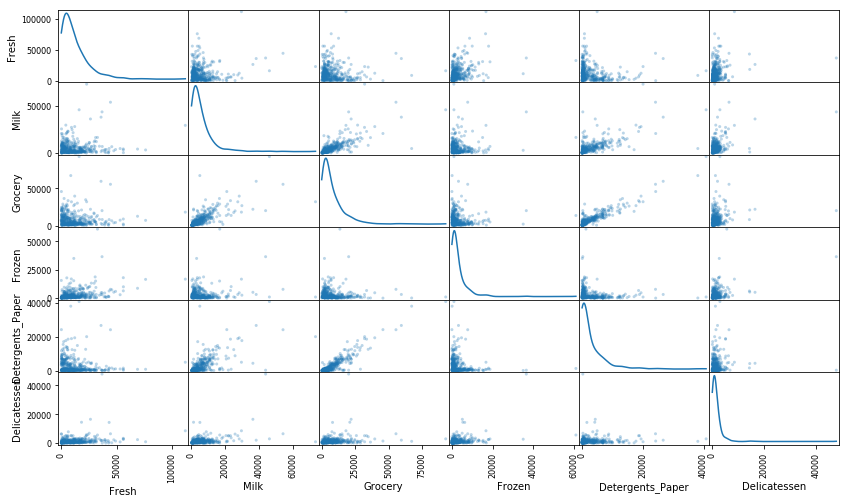

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

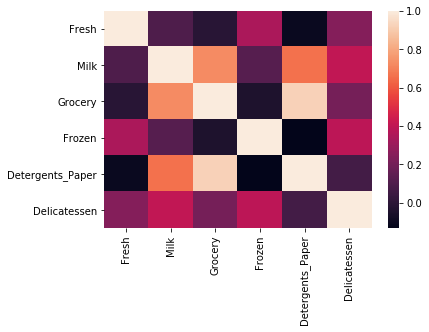

In [8]:
import seaborn as sns

sns.heatmap(data.corr())

**Answer:**

* Looking at the diagoal of the scatter matrix each feature appears to follow a log-normal distribution. This is inline with the [blog artical](http://www.win-vector.com/blog/2010/02/living-in-a-lognormal-world/) in win-vector: *The distribution of highly skewed positive data, like the value of profitable customers, incomes, sales, or stock prices, can often be modelled as a lognormal distribution.* We can observe a significant cluster close to zero, all datapoints are positive, and we can observe long tails.
* Looking at the heatmap, we can see that the diagonal is perfectly correlated. This is no surprise: the diagonal denotes the correlation of each feture with itself. Apart from the diagonal we can see high positive correlation of Detergents_Paper and Grocery, plus moderate positive correlation of both - Detergents_Paper and Grocery - with Milk. This observation is inline with the observation from the scatter matrix. Those, features exhibit scatter plots that with significantly elongated shapes.
* This observation is also exactly in line with my answer from question 2, identifying relatively lower importance of these three positively correlated categories (due to their correlation one could model one of them by the other two).
* The distribution of Detergents_Paper and Grocery follow a multivariate log-normal distribution with significantly positive off-diagonal entries in their variance-covariance matrix (i.e. they are positively correlated). The same holds true for their joint distribution with Milk. Only, teir off-diagonal elements of the variance-covariance matrix are not as large (i.e. the positive correlation is not as pronounced).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

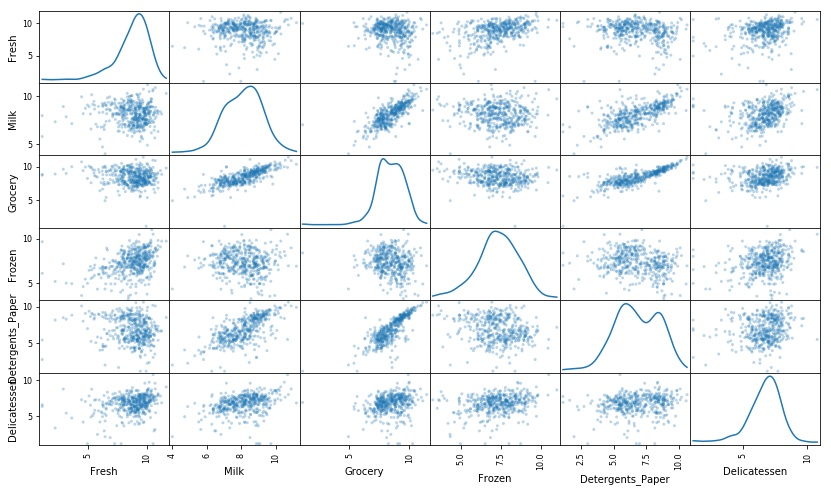

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(data.loc[indices])

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
10  8.121480  8.594710  9.470703  8.389360          8.695674      7.463937
20  9.772581  8.416046  8.434246  6.971669          7.722678      7.661056

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
data.index

RangeIndex(start=0, stop=440, step=1)

In [12]:
# For each feature find the data points with extreme high or low values
outlier_indeces =[]
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3- Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}' (IQR from {} to {}):".\
          format(feature, str(round(Q1 - step, 1)), str(round(Q3 + step, 1))))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_indeces.extend(list(log_data[~((log_data[feature] >= Q1 - step) & \
                                           (log_data[feature] <= Q3 + step))].index))
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh' (IQR from 5.5 to 12.3):


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk' (IQR from 5.0 to 11.2):


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery' (IQR from 5.3 to 11.7):


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen' (IQR from 4.3 to 10.5):


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper' (IQR from 1.5 to 12.4):


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen' (IQR from 3.8 to 9.7):


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

In [13]:
# check if outliers constitute outliers for more than one feature
['Point {} is considered an outlier for {} features'.format(index, outlier_indeces.count(index)) \
     for index in set(outlier_indeces) if outlier_indeces.count(index)>1]

['Point 128 is considered an outlier for 2 features',
 'Point 154 is considered an outlier for 3 features',
 'Point 65 is considered an outlier for 2 features',
 'Point 66 is considered an outlier for 2 features',
 'Point 75 is considered an outlier for 2 features']

In [14]:
# Compare outliers candidates with feature-averages
print('Feature averages:')
display(log_data.mean())
for i in [65, 66, 75, 128, 154]:
    print('Outlier candidate at index {}:'.format(i))
    display(log_data.loc[i, :])

Feature averages:


Fresh               8.730544
Milk                8.121047
Grocery             8.441169
Frozen              7.301396
Detergents_Paper    6.785972
Delicatessen        6.665133
dtype: float64

Outlier candidate at index 65:


Fresh                4.442651
Milk                 9.950323
Grocery             10.732651
Frozen               3.583519
Detergents_Paper    10.095388
Delicatessen         7.260523
Name: 65, dtype: float64

Outlier candidate at index 66:


Fresh               2.197225
Milk                7.335634
Grocery             8.911530
Frozen              5.164786
Detergents_Paper    8.151333
Delicatessen        3.295837
Name: 66, dtype: float64

Outlier candidate at index 75:


Fresh               9.923192
Milk                7.036148
Grocery             1.098612
Frozen              8.390949
Detergents_Paper    1.098612
Delicatessen        6.882437
Name: 75, dtype: float64

Outlier candidate at index 128:


Fresh               4.941642
Milk                9.087834
Grocery             8.248791
Frozen              4.955827
Detergents_Paper    6.967909
Delicatessen        1.098612
Name: 128, dtype: float64

Outlier candidate at index 154:


Fresh               6.432940
Milk                4.007333
Grocery             4.919981
Frozen              4.317488
Detergents_Paper    1.945910
Delicatessen        2.079442
Name: 154, dtype: float64

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Yes, there are points that are considered outliers for more than one feature (see chunks above).
* A central building block of KMeans is the average. The sensitivity of the average to oultiers carries over to the sensitivity of KMeans. As outlier candidates do not deviate substantially from the feature average (see chunk above), I do not consider them overly problematic for KMeans. Moreover, outlier candidates do not seem to origininate from corrupted data - no zeros which would result in a log of `-inf`, or artificially inflated values which would result in significant upward deviations. These outliers seem rather to constitute very large customers (index 65), or small specialized customers (other indeces). Summarizing, I would not recommend excluding these candidates from the analysis for two reasons: First, there is no substantial deviation from feature averages that would significantly skew aggregate results. Second: these outliers seem to constitute valid customers.
* I do not exclude any data-points.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

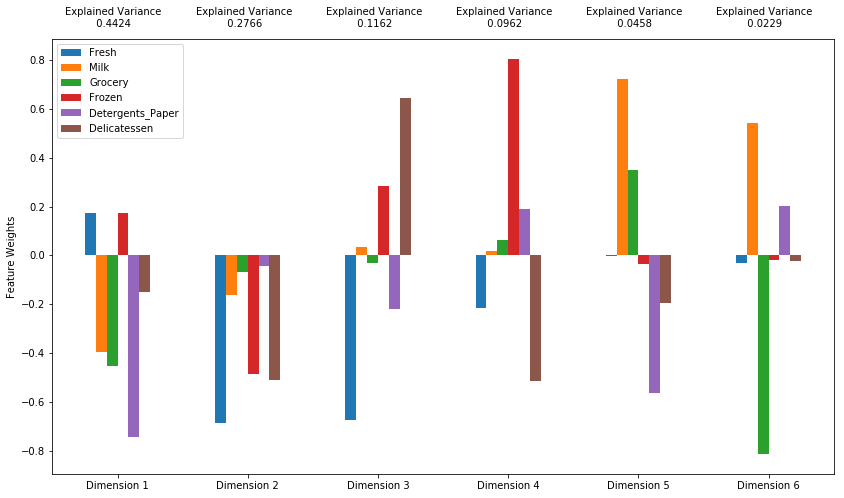

In [15]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [16]:
print('Explained total variance by principal component one and two: {}'.\
      format(round(sum(pca.explained_variance_ratio_[:2]), 2)))
print('Explained total variance by principal component one to four: {}'.\
      format(round(sum(pca.explained_variance_ratio_[:4]), 2)))

Explained total variance by principal component one and two: 0.72
Explained total variance by principal component one to four: 0.93


In [17]:
print('Eigenvectors of pca:\n')
print(pca.components_)

Eigenvectors of pca:

[[ 0.17371704 -0.394463   -0.45436364  0.17219603 -0.74551495 -0.1494356 ]
 [-0.68513571 -0.16239926 -0.06937908 -0.487691   -0.04191162 -0.50970874]
 [-0.67351166  0.03306794 -0.03218274  0.28481122 -0.21824404  0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [-0.00082162  0.72228834  0.34799325 -0.03624337 -0.56366476 -0.19536639]
 [-0.02927638  0.54303508 -0.81390826 -0.0174477   0.20244363 -0.02283197]]


**Answer:**

* The cumulative variance explained by principal component one and two constitutes 72% of total variance (see chunk above). 
* The cumulative variance explained by principal component one to four constitutes 93% of total variance (see chunk above).
* Each principal component (pc) constitutes an Eigenvector of the transformed space. Each feature weight constitutes one component of the Eigenvector represented in the original space. Thus, the Eigenvector pc1 of the first pc in the original space (spanned by original features) equals *1/10 (17 Fresh - 39 Milk - 45 Grocery + 17 Frozen - 74 Detergents_Paper - 15 Delicatessen)*. By definition Eigenvectors are agnostic about being multiplied by minus 1. Thus, the positive weight for Fresh and Milk in pc1 does not imply a higher signifiacance of Fresh and Milk relative to the other features. It solely implies, that Fresh and Milk are inversly related to the other features. The importance of original features in Eigenvectors can be ranked by the absolute value of their weight. The top three important features in pc1 are Detergents, Grocery, Milk (in this order). Thus the direction of the 1dim-hyperplane spanned by pc1 varies most strongly w.r.t. these original features. The second Eigenvector pc2 picks up exactly the dimensions that have been of minor importance for pc1. It varies most strongly with Fresh, Frozen, and Delicatessen. This makes sense, as this maximizes their joint importance. The third Eigenvector pc3 also puts high importance on Fresh and Delicatessen. However, it combines them negatively, and thus again pointing in an orthogonal direction as pc2. The fourth Eigenvector pc4 also picks to important features from pc2 - Frozen and Delicatessen - and combines them negatively generating another orthogonal 1dim-hyperplane. Pc1 explains 44% of total variance, pc2 explains 28%, pc3 explains 12%, and pc4 explains 10%. The importance drops with increasing number. This is caused by the fact that pc1 points in the direction of highest variance of the total dataset, pc2 points in the direction of highest residual variance after controlling for pc1, etc. Pc1 describes custumers that spend a similar amount for Detergents, Grocery, and Milk. Pc2 describes custumers that spend a similar amount for Fresh, Frozen, and Delicatessen. Pc3 describes custumers that spend either much on Fresh and little on Delicatessen, or the other way around. Pc4 describes custumers that spend either much on Frozen and little on Delicatessen, or the other way around.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.1273      -1.4580       0.5247       0.4620      -0.6799   
1      -2.1162      -0.7488       0.8007       1.0355      -0.5710   
2      -0.8361      -1.1474      -0.3482      -0.8175      -0.5008   

   Dimension 6  
0      -0.6652  
1      -0.2135  
2       0.3080

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.1273      -1.4580
1      -2.1162      -0.7488
2      -0.8361      -1.1474

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

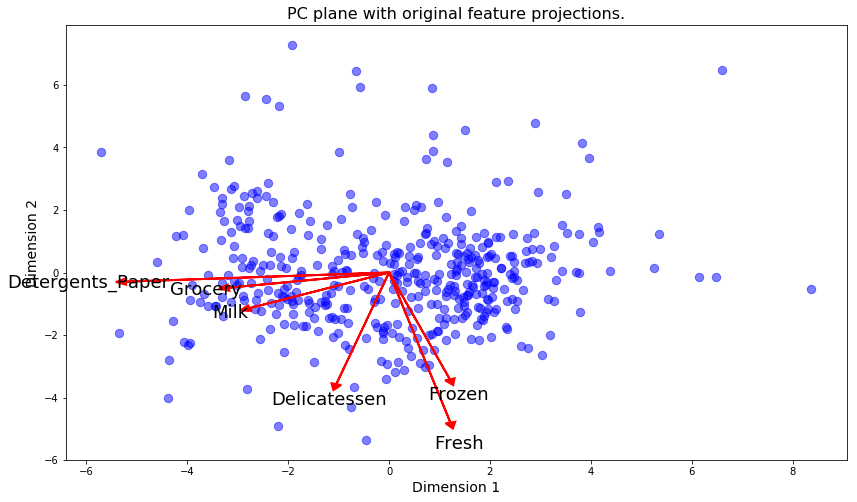

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

This interesting [blog post](https://www.datascience.com/blog/k-means-alternatives) on *datascience.com* explores pros and cons of using KNN and Gaussian Mixture Models for customer data.

* K-Means is computationally fast (even on very large datasets), it is easy to understand, to communicate, and to interpret. It is especially strong if clusters are spatially seperated and spherical.
* GMM is less fast, but much more flexible than K-Means. While K-Means assumes spherical clusters around the cluster centers, GMM allows clusters to follow multivariate normal distributions. This means GMM allows for feature correlation, while K-Means does not. Furthermore, GMM is a soft clustering method. It determines probabilities of cluster membership, rather than just putting each point in only one cluster. This helps understanding overlapping clusters more efficiently. While KNN draws one sharp border between two different clusters, GMM can capture continuos intersections.
* The speed of K-Means is not overly important here. We perform a one-shot analysis, and do not aim at building a real-time classifier for production. Plus, the dataset is quite small. The advantages of communication the model and the results with ease and little danger of mis-interpretation should surely not be neglected. After all, business-decisions will not be conducted by the analyst, but rather by business-stakeholders with less theoretical background. However, in this case the advantages of GMM prevail. Most importantaly, the advantage of GMM on overlapping clusters. The biplot above does not display spatially separated clusters. Furthermore, GMM can deal with feature-correlation. We did see significant feature-correlation in the original dataset and this indicates that there also might be some important feature-correlation in clusters (even after controlling for feature-correlation via PCA on aggregate level). Moreover, the probabilistic cluster membership might reveal valuable additional information about custumers that we would gain using KNN.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for i in range(2,10):
    clusterer = GaussianMixture(n_components=i, random_state=42)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    print('The silhouette score for {} clusters is {}'.format(i, score))

The silhouette score for 2 clusters is 0.40988540434723414
The silhouette score for 3 clusters is 0.41057253380975
The silhouette score for 4 clusters is 0.30292365393603726
The silhouette score for 5 clusters is 0.23438543685617177
The silhouette score for 6 clusters is 0.2974544206931666
The silhouette score for 7 clusters is 0.35301486966037743
The silhouette score for 8 clusters is 0.31424715790984425
The silhouette score for 9 clusters is 0.30303997261761323


In [31]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=3, random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The silhouette score ranges from -1 (very bad) to 1 (very good). The chunk above reports the silhouette score for 2 to 10 clusters. Fitting 3 clusters yields the highest (best) silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

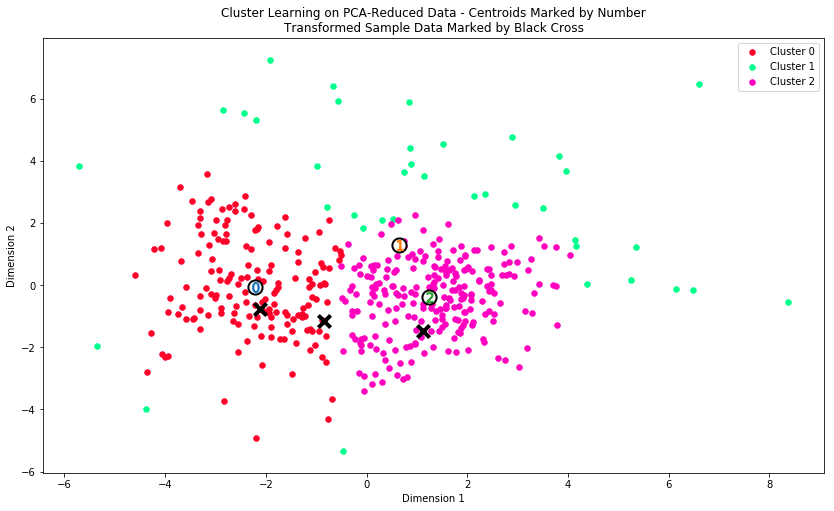

In [32]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [33]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  4414.0  8158.0  12750.0  1046.0            4636.0        1132.0
Segment 1  2822.0  2100.0   3142.0   875.0             514.0         364.0
Segment 2  9985.0  2198.0   2712.0  2213.0             358.0         793.0

In [43]:
# Compare cluster centers with averages of dataset
for i in range(3):
    print('\nCluster {}:'.format(i))
    print(true_centers.iloc[i, :] / data.mean())


Cluster 0:
Fresh               0.367824
Milk                1.407458
Grocery             1.603516
Frozen              0.340502
Detergents_Paper    1.608888
Delicatessen        0.742358
dtype: float64

Cluster 1:
Fresh               0.235161
Milk                0.362302
Grocery             0.395157
Frozen              0.284837
Detergents_Paper    0.178380
Delicatessen        0.238709
dtype: float64

Cluster 2:
Fresh               0.832063
Milk                0.379210
Grocery             0.341077
Frozen              0.720394
Detergents_Paper    0.124241
Delicatessen        0.520044
dtype: float64


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Comparing the cluster center feature values with the average feature values of the total dataset (see chunk above), reveals that cluster center 0 represents a rather large customer with high demand in Milk, Grocery, and Detergents_Paper. Cluster center 1 represents a much smaller customer (it is significantly smaller than cluster center 0 in every feature) with balanced features. Feature values vary only from 0.18 to 0.39 relative to the averages of the total dataset. Cluster center 3 represents a customer that is smaller than cluster center 0, but not as small as cluster center 1. There is a clear feature imbalance with relatively high demand in Fresh and Frozen and relatively little demand in Detergents_Paper.

Segment 0 might represent large canteens with high demand in Milk for Coffe, high demand in Grocery for cooking "simple" food (not high in Delicatessen), and high demand in Detergents_Paper to keep up with the potentially high customer transition and the corresponding high frequency of dirty tables. The cluster center for segment 1 might represent a small corner shop. It has low and balanced demand for all products. However, looking at cluster vizualization above we can see that segment 1 spreads far in all directions. This means it does also contain customers that are very large w.r.t. some features and also very imbalanced. Hence, in the case of segment 1 it might make less sense to associate all its points with some representative. Segment 2 has relatively high demand in Fresh and Frozen and relatively little demand in Detergents_Paper. This might be a little ice cream parlor just selling its product on the street without tables (and hence reduced need for Detergents_Paper).

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [44]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [50]:
# Compare sample points with averages of dataset
for i in range(3):
    print('\nSample point {}:'.format(i))
    print(data.loc[indices[i], :] / data.mean())


Sample point 0:
Fresh               1.105389
Milk                0.206340
Grocery             0.530858
Frozen              2.084682
Detergents_Paper    0.175950
Delicatessen        1.172559
dtype: float64

Sample point 1:
Fresh               0.280493
Milk                0.932152
Grocery             1.631688
Frozen              1.432323
Detergents_Paper    2.074272
Delicatessen        1.143704
dtype: float64

Sample point 2:
Fresh               1.462130
Milk                0.779640
Grocery             0.578775
Frozen              0.347013
Detergents_Paper    0.783969
Delicatessen        1.392905
dtype: float64


**Answer:**

Sample point 0 is predicted to belong to segment 2. This in line with the initial observation in Question 1 where we already identified the idiosyncrasy of this customers high demand in Fresh and Frozen. Sample point 1 and 2 are both are allocated to segment 0. Even though those sample points differ strongly in all features except Milk and Delicatessen the GMM classifier is not able to distinguish them based on the fitted cluster centers, as these cluster centers do not screen for these feature differences.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Reducing the delivery service from 5 days a week to 3 days a week will surely impact different customers differently. E.g. a customer who needs fresh fruits every workingday of the week will be impacted much more negatively than a customers who is ordering the same amount of detergents and papers once every week. Hence, it does make sense to run an A/B test, splitting every segment into a test- and control-group (deploying the new delivery scheme only for the test-group), evaluating the result on every segment separately, and only switching to the new delivery system on those segments with a statistically significant positiv reaction on the test group (of course "positive reaction" needs to be specified more precisely, it might mean less loss from declining orders than gain from saved delivery costs).

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

A supervised learner could be trained on existing customers with features being given by annual spending on each product category and the target being given by the engineered feature customer segment. This supervised learner predicts customer segments for these ten new customers based on their estimated annual spendings per product category.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

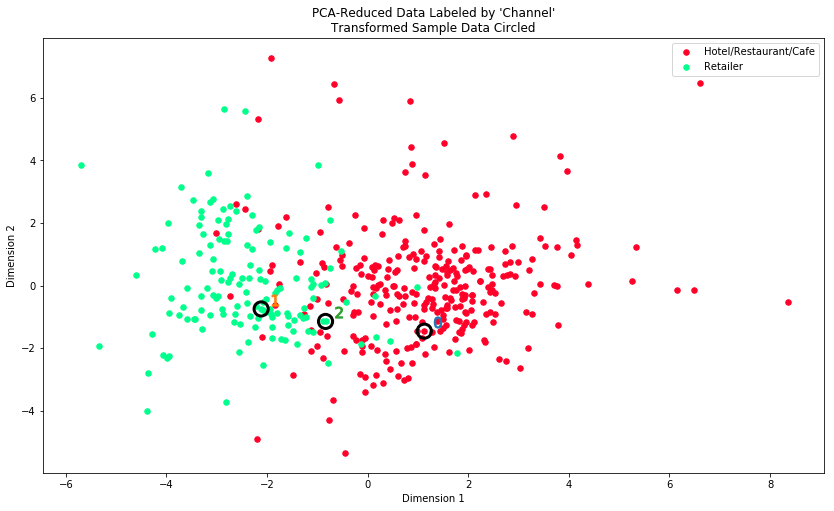

In [51]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* The GMM above produces very similar results. It also introduces a vertical split somewhere close to Dimension1=-1/2. However, it introduced one additional segment containing all the loosly scattered points around the more dense regions. Revisiting the silhouette score for the GMM, we can see that two segments imply the second best model performance and that the model performance for three segments is only slightly better. Hence, also GMM considers two segments a reasonable choice.
* Customer segment 0 from the GMM corresponds to 'Hotels/Restaurants/Cafes'. Customer segment 2 from the GMM corresponds to 'Retailers'. However, customers from segment 0 will not be purely 'Hotels/Restaurants/Cafes'. E.g., there are some 'Retailers' on the right hand side of Dimension1=0. Those, would have been predicted to belong to segment 0 by GMM even though they are not 'Hotels/Restaurants/Cafes'. Similarly, there are some 'Hotels/Restaurants/Cafes' to the left of Dimension1=-2. These would have been predicted to belong to segment 2.
* I do not consider our GMM segments consistent with grouping into 'Retailers' or 'Hotels/Restaurants/Cafes'. However, I do not consider it completely off either. For consistency GMM needs to split the data only into two segments and not into three. If more customers are aquired and also the space outside the dense regions gets populated, then the inconsistency arising from splitting customers into three segments will be amplified and be more apparent. However, GMM does a good job at splitting segment 0 and segment 2 along the visual border of 'Hotels/Restaurants/Cafes' and 'Retailers'. Hence, segments 0 and 2 are consistent with splitting customers into 'Hotels/Restaurants/Cafes' and 'Retailers' (if we simply ignore segment 1).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.